## import modules

In [1]:
# Import basic modules
import math
import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Ignore some annoying warnings
from datetime import datetime

# Import module for EMD decomposition
# It is the EMD-signal module with different name to import
from PyEMD import EMD,EEMD,CEEMDAN,Visualisation #For module 'PyEMD', please use 'pip install EMD-signal' instead.

# Import modules for LSTM prediciton
# Sklearn
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_absolute_percentage_error # MAPE


# Statistical tests
from statsmodels.tsa.stattools import adfuller # adf_test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test # LB_test
from statsmodels.stats.stattools import jarque_bera as jb_test # JB_test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # plot_acf_pacf

from sklearn.preprocessing import StandardScaler

import yfinance as yf

from xgboost import XGBRegressor as XGBR

In [2]:
# Statistical tests
from statsmodels.tsa.stattools import adfuller # adf_test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test # LB_test
from statsmodels.stats.stattools import jarque_bera as jb_test # JB_test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # plot_acf_pacf

# function

In [3]:
# do ADF, LB_test, JB_test and plot ACF and PACF
def statistical_tests(series,name): 
    adf_test(series)
    print()
    LB_test(series)
    print()
    JB_test(series)
    print()
    plot_acf_pacf(series,name)

In [32]:
# Augmented Dickey-Fuller test (ADF test) for stationarity
def adf_test(series):
    adf_ans = adfuller(series) # The outcomes are test value, p-value, lags, degree of freedom.
    print('ADF Test')
    print('Test value:',adf_ans[0])
    print('P value:',adf_ans[1])
    print('Lags:',adf_ans[2])
    print('1% confidence interval:',adf_ans[4]['1%'])
    print('5% confidence interval:',adf_ans[4]['5%'])
    print('10% confidence interval:',adf_ans[4]['10%'])
    #print(adf_ans) 

In [5]:
# Ljung-Box Test for autocorrelation
def LB_test(series):
    lb_ans = lb_test(series,lags=None,boxpierce=False) #The default lags=40 for long series.
    print('Ljung-Box Test')

    # Plot p-values in a figure
    fig = plt.figure(figsize=(10,3))
    pd.Series(lb_ans.iloc[:,1]).plot(label="Ljung-Box Test p-values")
    plt.xlabel('Lag')
    plt.legend()
    plt.show()
    
    # Brief review
    if np.sum(lb_ans.iloc[:,1])<=0.05: 
        print('The sum of p-value is '+str(np.sum(lb_ans.iloc[:,1]))+'<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.')
    else: print('Please view with the line chart, the autocorrelation of the series may be not strong.')
    
    # Show the outcome
    # print(pd.DataFrame(lb_ans)) # The outcomes are test value at line 0, and p-value at line 1.

In [6]:
# Jarque-Bera Test for normality
# ------------------------------- 
def JB_test(series=None):
    jb_ans = jb_test(series) # The outcomes are test value, p-value, skewness and kurtosis.
    print('Jarque-Bera Test')
    print('Test value:',jb_ans[0])
    print('P value:',jb_ans[1])
    print('Skewness:',jb_ans[2])
    print('Kurtosis:',jb_ans[3])

    # Brief review
    if jb_ans[1]<=0.05: 
        print('p-value is '+str(jb_ans[1])+'<=0.05, rejecting the null hypothesis that the series has no normality.')
    else:
        print('p-value is '+str(jb_ans[1])+'>=0.05, accepting the null hypothesis that the series has certain normality.')


In [84]:
# Plot ACF and PACF figures
# ------------------------------- 
def plot_acf_pacf(series,name):
    print('ACF and PACF')
    fig = plt.figure(figsize=(10,5))
    fig1 = fig.add_subplot(211)
    plot_acf(series, lags=40, ax=fig1)
    fig2 = fig.add_subplot(212)
    plot_pacf(series, lags=40, ax=fig2)

    #Save the figure
    plt.tight_layout() 
    plt.savefig(name+' ACF and PACF of Series.jpg')
    plt.show()

# HSI

In [90]:
data = yf.download("^HSI", start="2017-07-26", end="2022-07-26")

[*********************100%***********************]  1 of 1 completed


In [91]:
data = data.iloc[:,[0,1,2,3,5]]
#data.index = range(len(data))

In [92]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-26,26960.810547,27007.269531,26786.630859,26941.019531,2176480400
2017-07-27,27002.699219,27169.150391,26962.029297,27131.169922,1763945900
2017-07-28,27007.970703,27047.880859,26928.439453,26979.390625,1456040200
2017-07-31,27048.449219,27324.380859,27045.410156,27323.990234,1693214100
2017-08-01,27326.039062,27558.000000,27326.039062,27540.230469,2392422600


In [93]:
data.shape

(1231, 5)

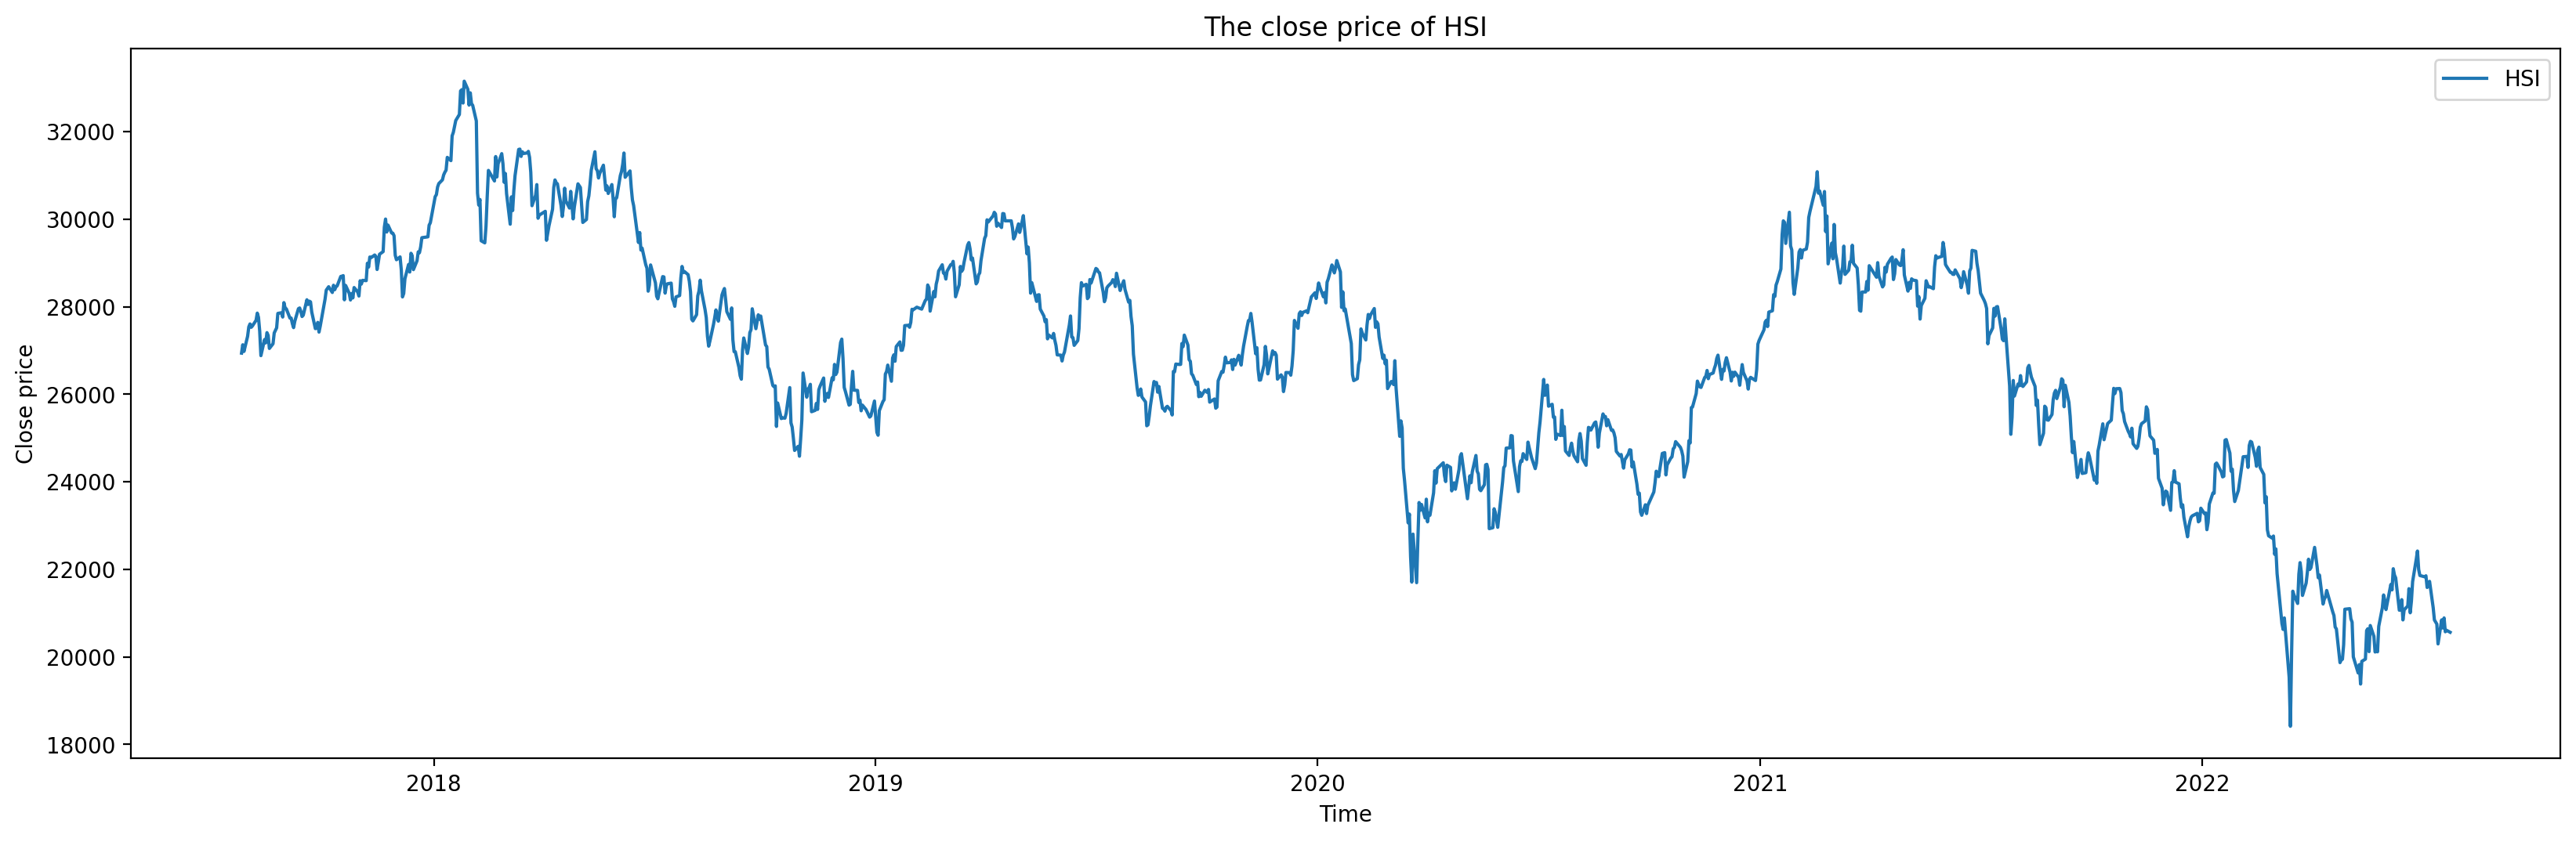

In [94]:
plt.figure(figsize=(20,6),dpi=200)
plt.title('The close price of HSI')
plt.plot(data['Close'],label = 'HSI')
plt.ylabel('Close price')
plt.xlabel('Time')
plt.legend()
plt.savefig("./HSI.jpg")
plt.show()

In [95]:
series1 = data['Close']

ADF Test
Test value: -1.6283658885828223
P value: 0.46834618775973386
Lags: 0
1% confidence interval: -3.4356776419985953
5% confidence interval: -2.863892657513944
10% confidence interval: -2.5680225884063717

Ljung-Box Test


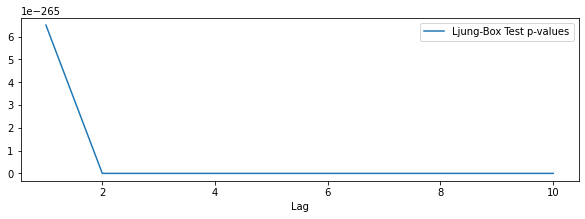

The sum of p-value is 6.503572822598994e-265<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.

Jarque-Bera Test
Test value: 35.79385170066958
P value: 1.6883553570847195e-08
Skewness: -0.4124496878418336
Kurtosis: 2.8681277837327537
p-value is 1.6883553570847195e-08<=0.05, rejecting the null hypothesis that the series has no normality.

ACF and PACF


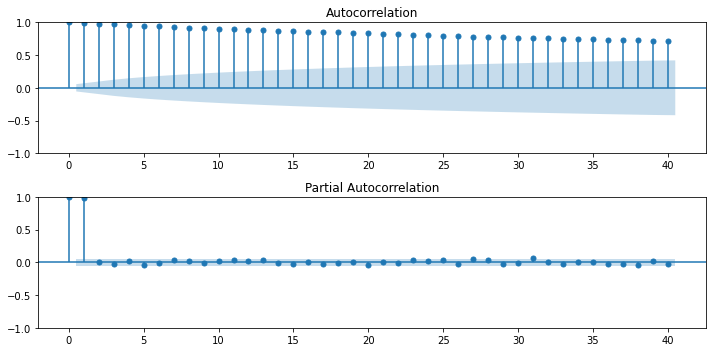

In [96]:
statistical_tests(series1,"HSI")

# GDAXI

In [85]:
data = yf.download("^GDAXI", start="2017-07-26", end="2022-07-26")
data = data.iloc[:,[0,1,2,3,5]]
#data.index = range(len(data))

[*********************100%***********************]  1 of 1 completed


In [86]:
data.shape

(1264, 5)

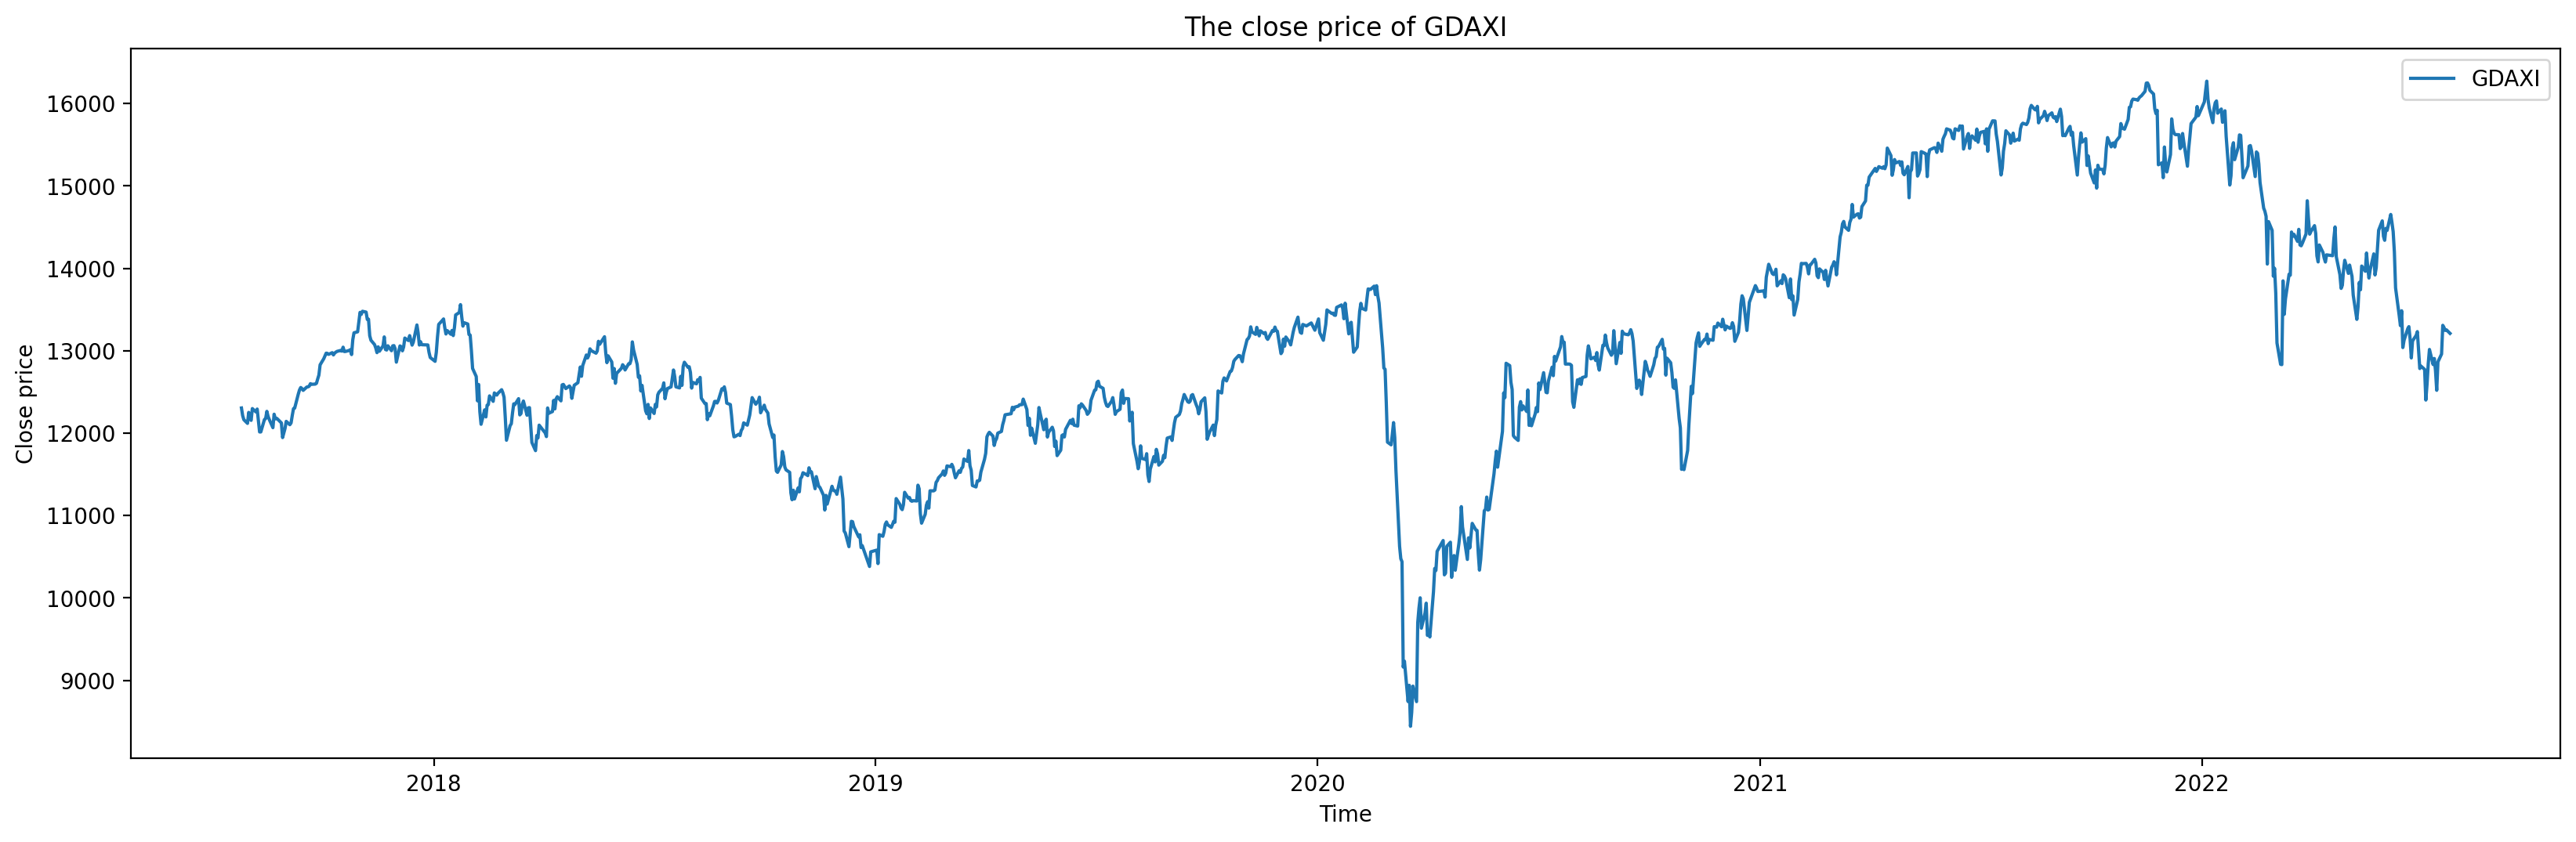

In [87]:
plt.figure(figsize=(20,6),dpi=200)
plt.title('The close price of GDAXI')
plt.plot(data['Close'],label = 'GDAXI')
plt.ylabel('Close price')
plt.xlabel('Time')
plt.legend()
plt.savefig("./GDAXI.jpg")
plt.show()

In [88]:
series2 = data['Close']

ADF Test
Test value: -2.121728695470238
P value: 0.23586761454800292
Lags: 7
1% confidence interval: -3.4355671297788666
5% confidence interval: -2.8638438984080117
10% confidence interval: -2.5679966213893057

Ljung-Box Test


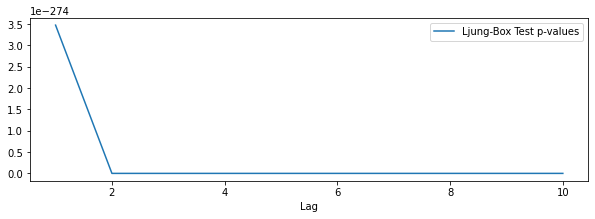

The sum of p-value is 3.476351850420027e-274<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.

Jarque-Bera Test
Test value: 17.836517242484938
P value: 0.0001339212494768361
Skewness: 0.25586468538960727
Kurtosis: 2.7228698861728464
p-value is 0.0001339212494768361<=0.05, rejecting the null hypothesis that the series has no normality.

ACF and PACF


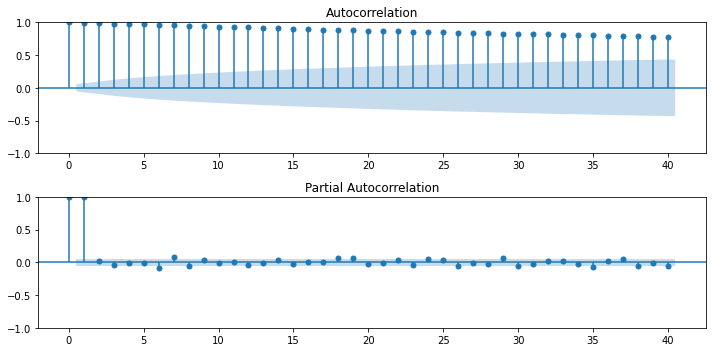

In [89]:
statistical_tests(series2,"GDAXI")

# oil

In [97]:
data = yf.download("CL=F", start="2017-07-26", end="2022-07-26")
data = data.iloc[:,[0,1,2,3,5]]
#data.index = range(len(data))

[*********************100%***********************]  1 of 1 completed


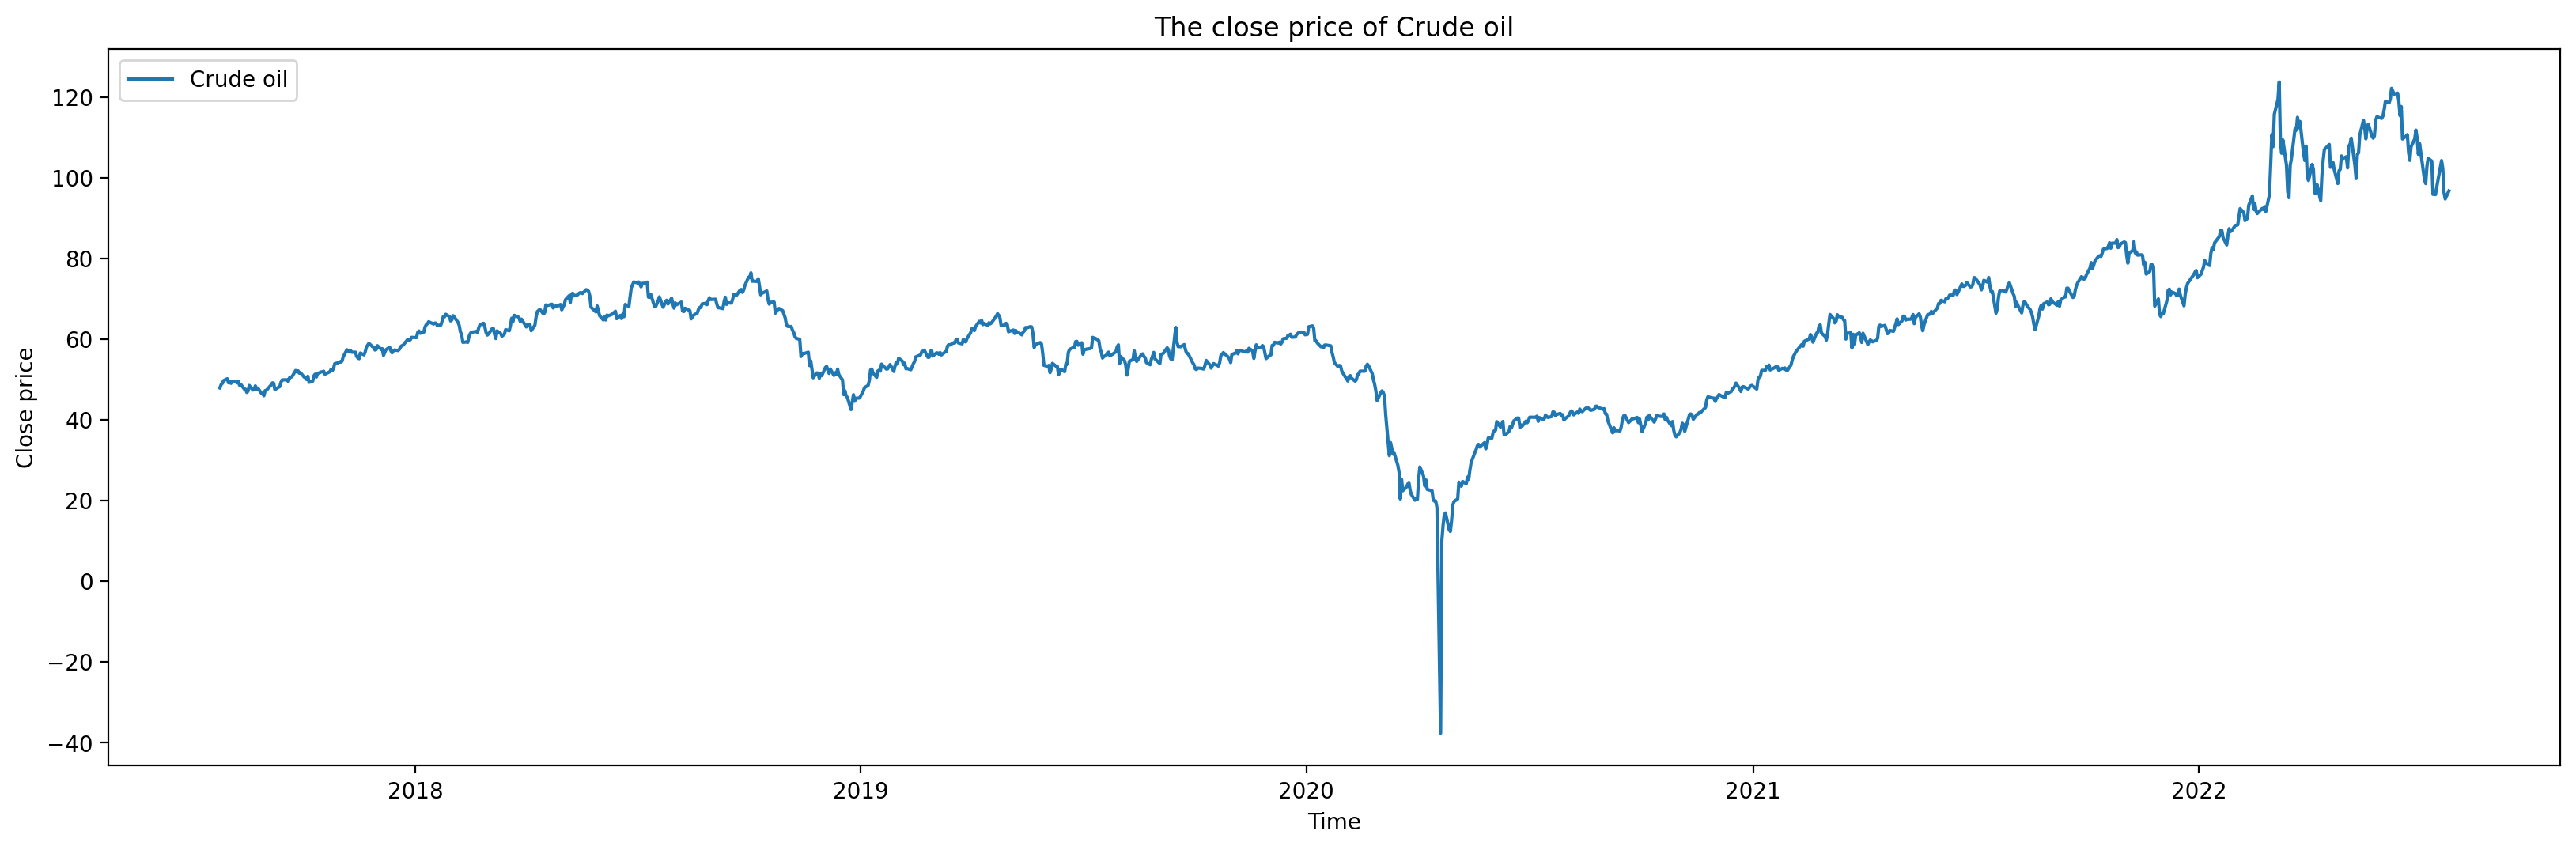

In [98]:
plt.figure(figsize=(20,6),dpi=200)
plt.title('The close price of Crude oil')
plt.plot(data['Close'],label = 'Crude oil')
plt.ylabel('Close price')
plt.xlabel('Time')
plt.legend()
plt.savefig("./Crude oil.jpg")
plt.show()

ADF Test
Test value: -1.1367871745330458
P value: 0.7001809541700743
Lags: 3
1% confidence interval: -3.4355629707955395
5% confidence interval: -2.863842063387667
10% confidence interval: -2.567995644141416

Ljung-Box Test


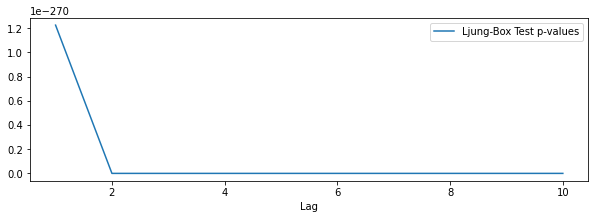

The sum of p-value is 1.2250822790991578e-270<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.

Jarque-Bera Test
Test value: 217.12056684695852
P value: 7.12636324322119e-48
Skewness: 0.6116932658054436
Kurtosis: 4.623476392178169
p-value is 7.12636324322119e-48<=0.05, rejecting the null hypothesis that the series has no normality.

ACF and PACF


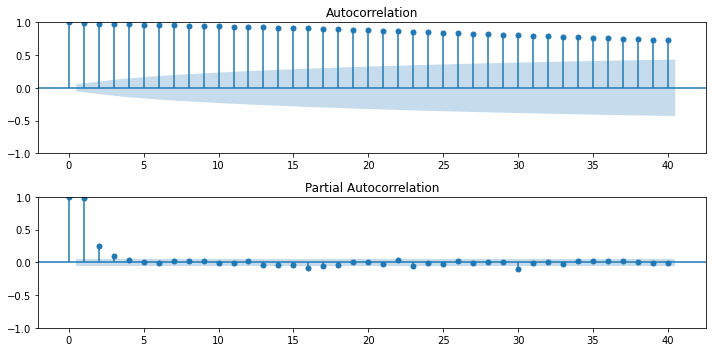

In [99]:
series5 = data['Close']
statistical_tests(series5,"Crude oil")

# apple

In [100]:
data = yf.download("AAPL", start="2017-07-26", end="2022-07-26")
data = data.iloc[:,[0,1,2,3,5]]
#data.index = range(len(data))

[*********************100%***********************]  1 of 1 completed


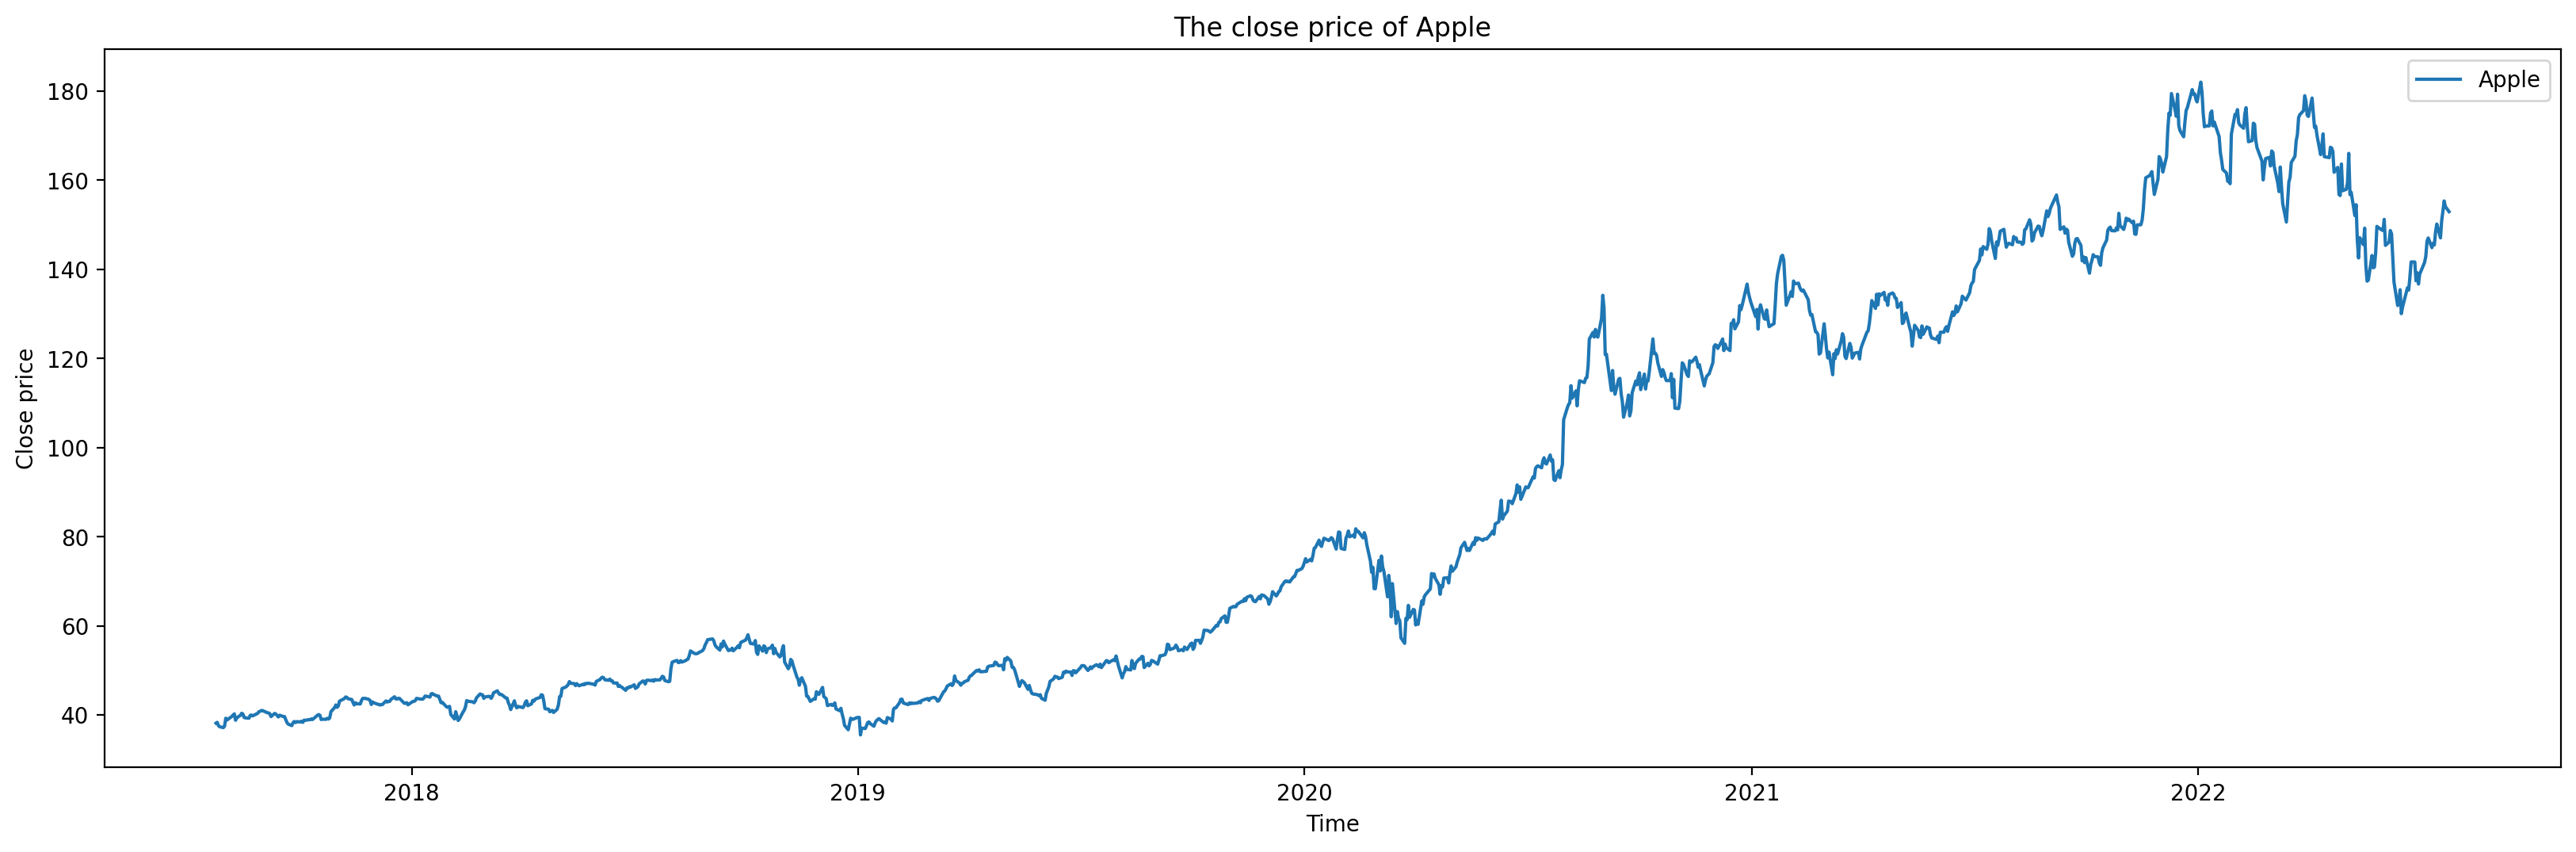

In [101]:
plt.figure(figsize=(20,6),dpi=200)
plt.title('The close price of Apple')
plt.plot(data['Close'],label = 'Apple')
plt.ylabel('Close price')
plt.xlabel('Time')
plt.legend()
plt.savefig("./Apple.jpg")
plt.show()

ADF Test
Test value: -0.38773936641111006
P value: 0.9121258254839848
Lags: 8
1% confidence interval: -3.435592223709696
5% confidence interval: -2.8638549702604803
10% confidence interval: -2.56800251776

Ljung-Box Test


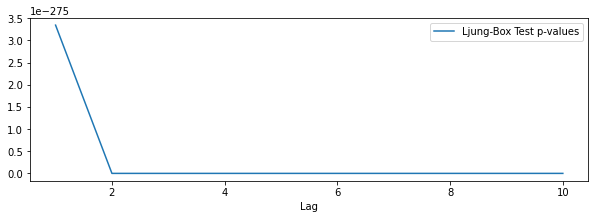

The sum of p-value is 3.346406239431915e-275<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.

Jarque-Bera Test
Test value: 141.46832657773734
P value: 1.9078454981723955e-31
Skewness: 0.4747882930734612
Kurtosis: 1.6601942690491824
p-value is 1.9078454981723955e-31<=0.05, rejecting the null hypothesis that the series has no normality.

ACF and PACF


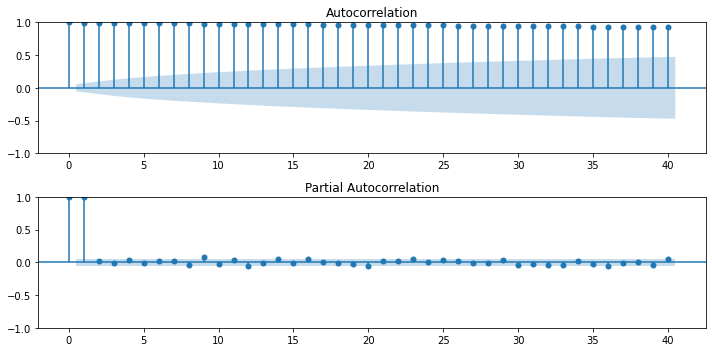

In [102]:
series3 = data['Close']
statistical_tests(series3,"Apple")

# bitcoin

In [103]:
data = yf.download("BTC-USD", start="2017-07-26", end="2022-07-26")
data = data.iloc[:,[0,1,2,3,5]]
#data.index = range(len(data))

[*********************100%***********************]  1 of 1 completed


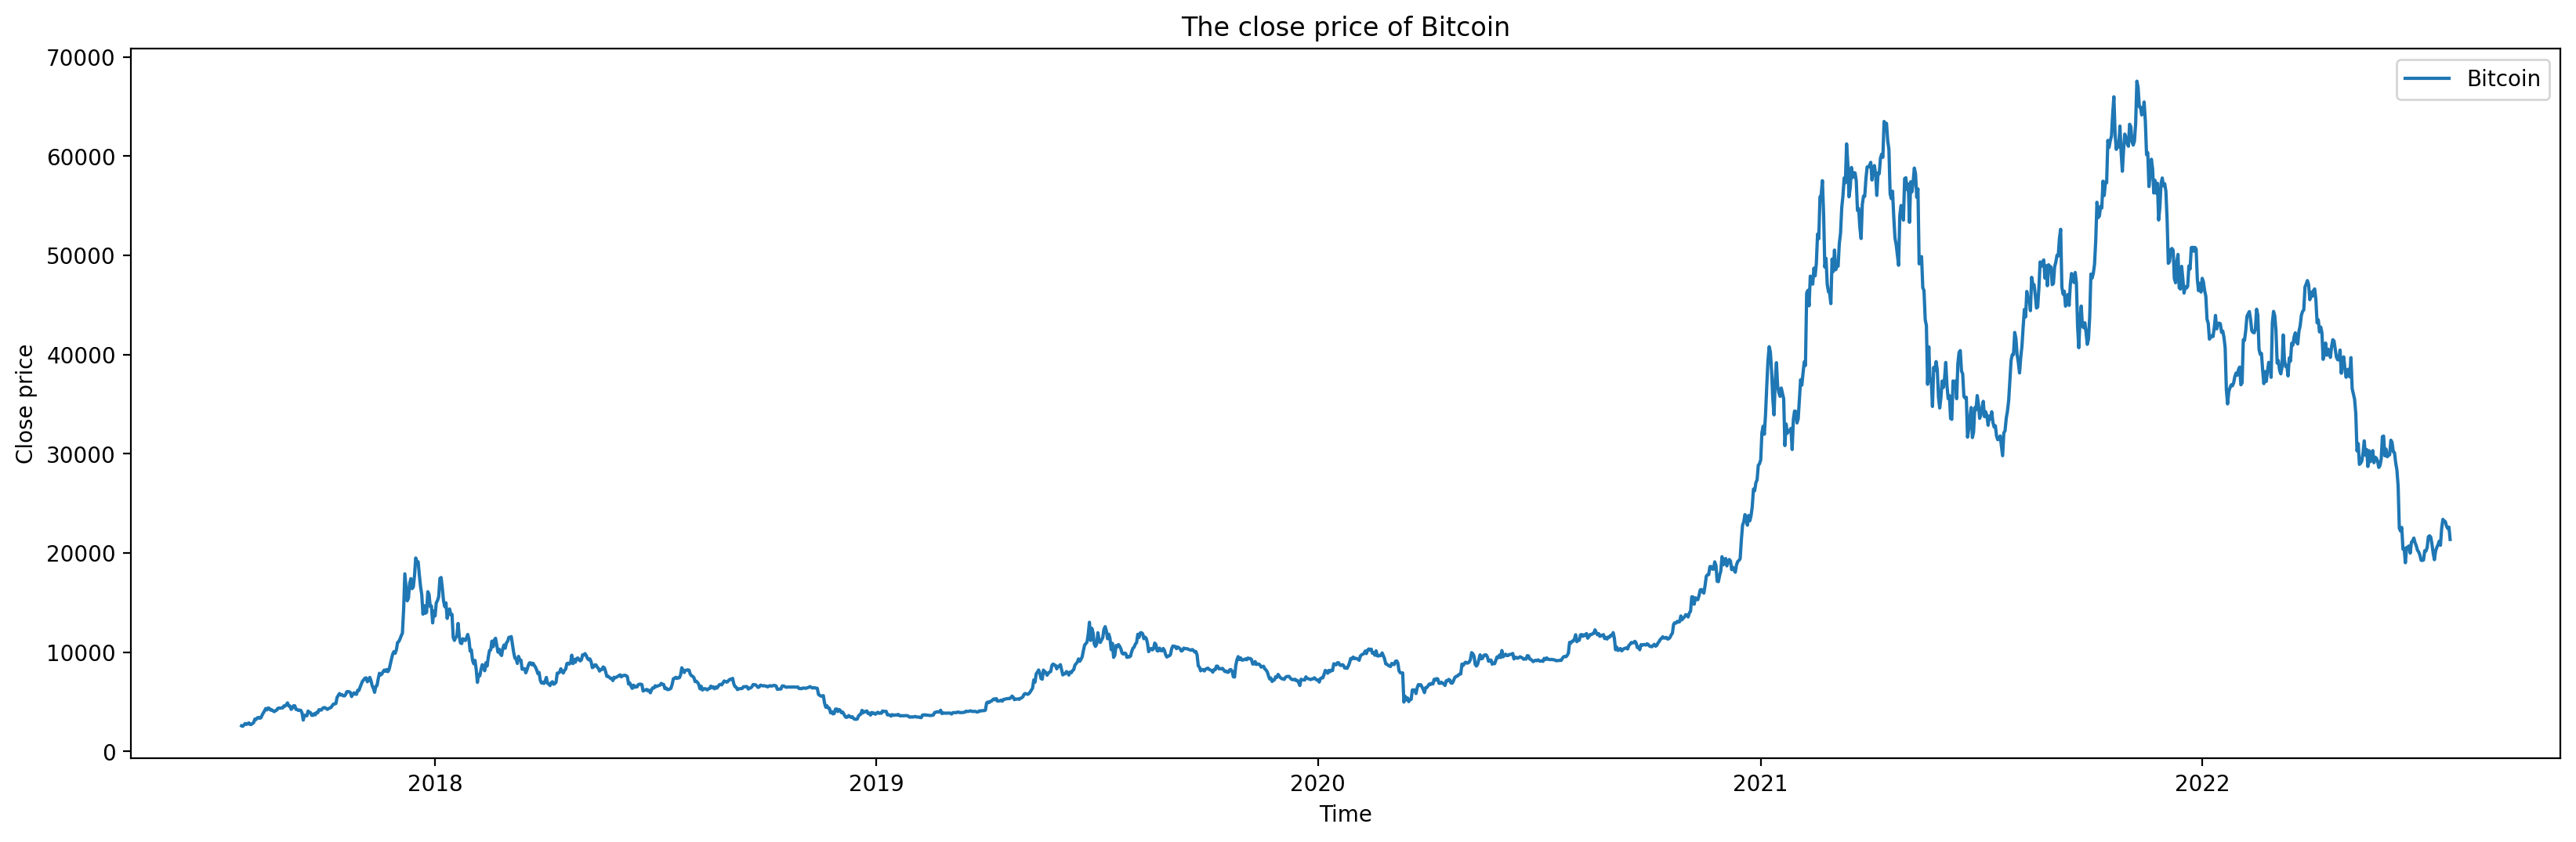

In [104]:
plt.figure(figsize=(20,6),dpi=200)
plt.title('The close price of Bitcoin')
plt.plot(data['Close'],label = 'Bitcoin')
plt.ylabel('Close price')
plt.xlabel('Time')
plt.legend()
plt.savefig("./Bitcoin.jpg")
plt.show()

ADF Test
Test value: -1.4644151338967029
P value: 0.5510355260812487
Lags: 24
1% confidence interval: -3.4339840952648695
5% confidence interval: -2.8631452508003057
10% confidence interval: -2.567624583142913

Ljung-Box Test


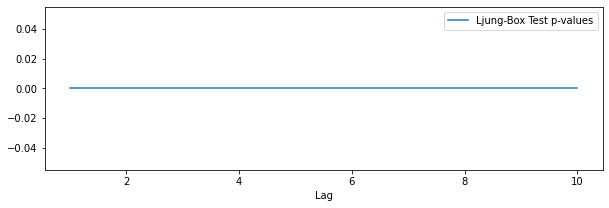

The sum of p-value is 0.0<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.

Jarque-Bera Test
Test value: 364.8382255749974
P value: 5.975660597904272e-80
Skewness: 1.086631891736269
Kurtosis: 2.73628633663022
p-value is 5.975660597904272e-80<=0.05, rejecting the null hypothesis that the series has no normality.

ACF and PACF


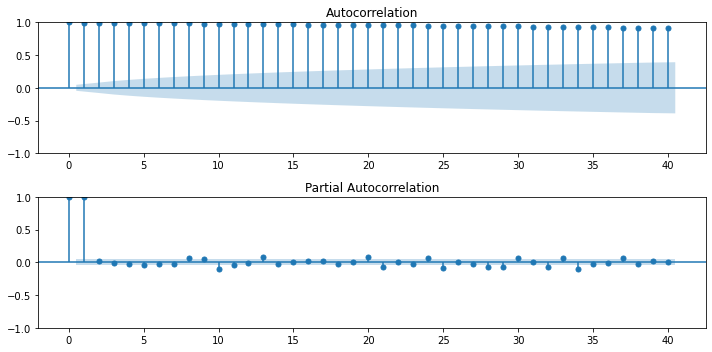

In [105]:
series4 = data['Close']
statistical_tests(series4,"Bitcoin")

In [106]:
def denoise_pred(df,model_type,ahead = 1):
    trainX,trainY = df_dateback(df)
    X0_train,X0_test = trainX[:-ahead],trainX[-ahead:]
    y0_train = trainY
    
    X0_train = X0_train.reshape(X0_train.shape[0],-1)
    X0_test = X0_test.reshape(X0_test.shape[0],-1)
    y0_train = y0_train.reshape(y0_train.shape[0])
    
    #define linear model
    if model_type == 'LR':
        regressor = LinearRegression()
    if model_type =='Lasso':
        regressor = Lasso(alpha=0.1)
    if model_type == 'Ridge':
        regressor = Ridge()
    if model_type == 'Xgboost':
        regressor = XGBR()
    if model_type == 'SVR':
        regressor = SVR()
    
    
    #print(X0_train.shape)
    #print(y0_train.shape)
    model = regressor.fit(X0_train,y0_train)
    # prediction on test set
    y_pred = model.predict(X0_test)
    
    return y_pred[0]